# 1. Image Preprocessing

Image Preprocessing: Takes all images and change the sizes, thus VGG16 can analyze them

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

In [1]:
def preprocess(file):
    try:
        img = image.load_img(file, target_size=(224, 224))
        feature = image.img_to_array(img)
        feature = np.expand_dims(feature, axis=0) 
        feature = preprocess_input(feature)
    except:
         print('Error:', file)
    return feature[0] 

imgs = [preprocess('/Users/jaykim/Desktop/Baby_clothes/'+str(i)+'.jpg') for i in range(1,21)]
X_pics = np.array(imgs)

Using TensorFlow backend.
/Users/jaykim/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# 2. Feature Extraction

Add a last layer to extract 4096 features from pictures

In [2]:
def feature_extraction(images):
    base_model = VGG16(weights='imagenet', include_top=True, input_shape = (224,224,3))

    for layer in base_model.layers:
         layer.trainable = False

    base_model.layers.pop()
    base_model.layers.pop()
    base_model.outputs = [base_model.layers[-1].output]
    base_model.summary( )

    pic_features = base_model.predict(images)
    return pic_features

pic_features = feature_extraction(X_pics)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
pic_features.shape

(20, 4096)

# 3. Cosine Similarity

Calculate cosine similarity 

In [4]:
dists = cosine_similarity(pic_features)
dists = pd.DataFrame(dists)

# 4. Displaying Clothes

Display a picture that the customer liked and display 5 recommended clothes

In [9]:
def get_similar(dists):    
    for item in range(len(dists)):
        L = [i[0] for i in sorted(enumerate(dists[item]), key=lambda x:x[1], reverse=True)]  
        print('                     ')
        print('=====================')
        print('=== Your Favorite ===', item)
        display(Image(filename=str(item+1)+'.jpg',width=200, height=200))
        print('--- Similar Clothes---')
        for i in L[1:6]:
            display(Image(filename=str(i+1)+'.jpg',width=200, height=200))
    return 

                     
=== Your Favorite === 0


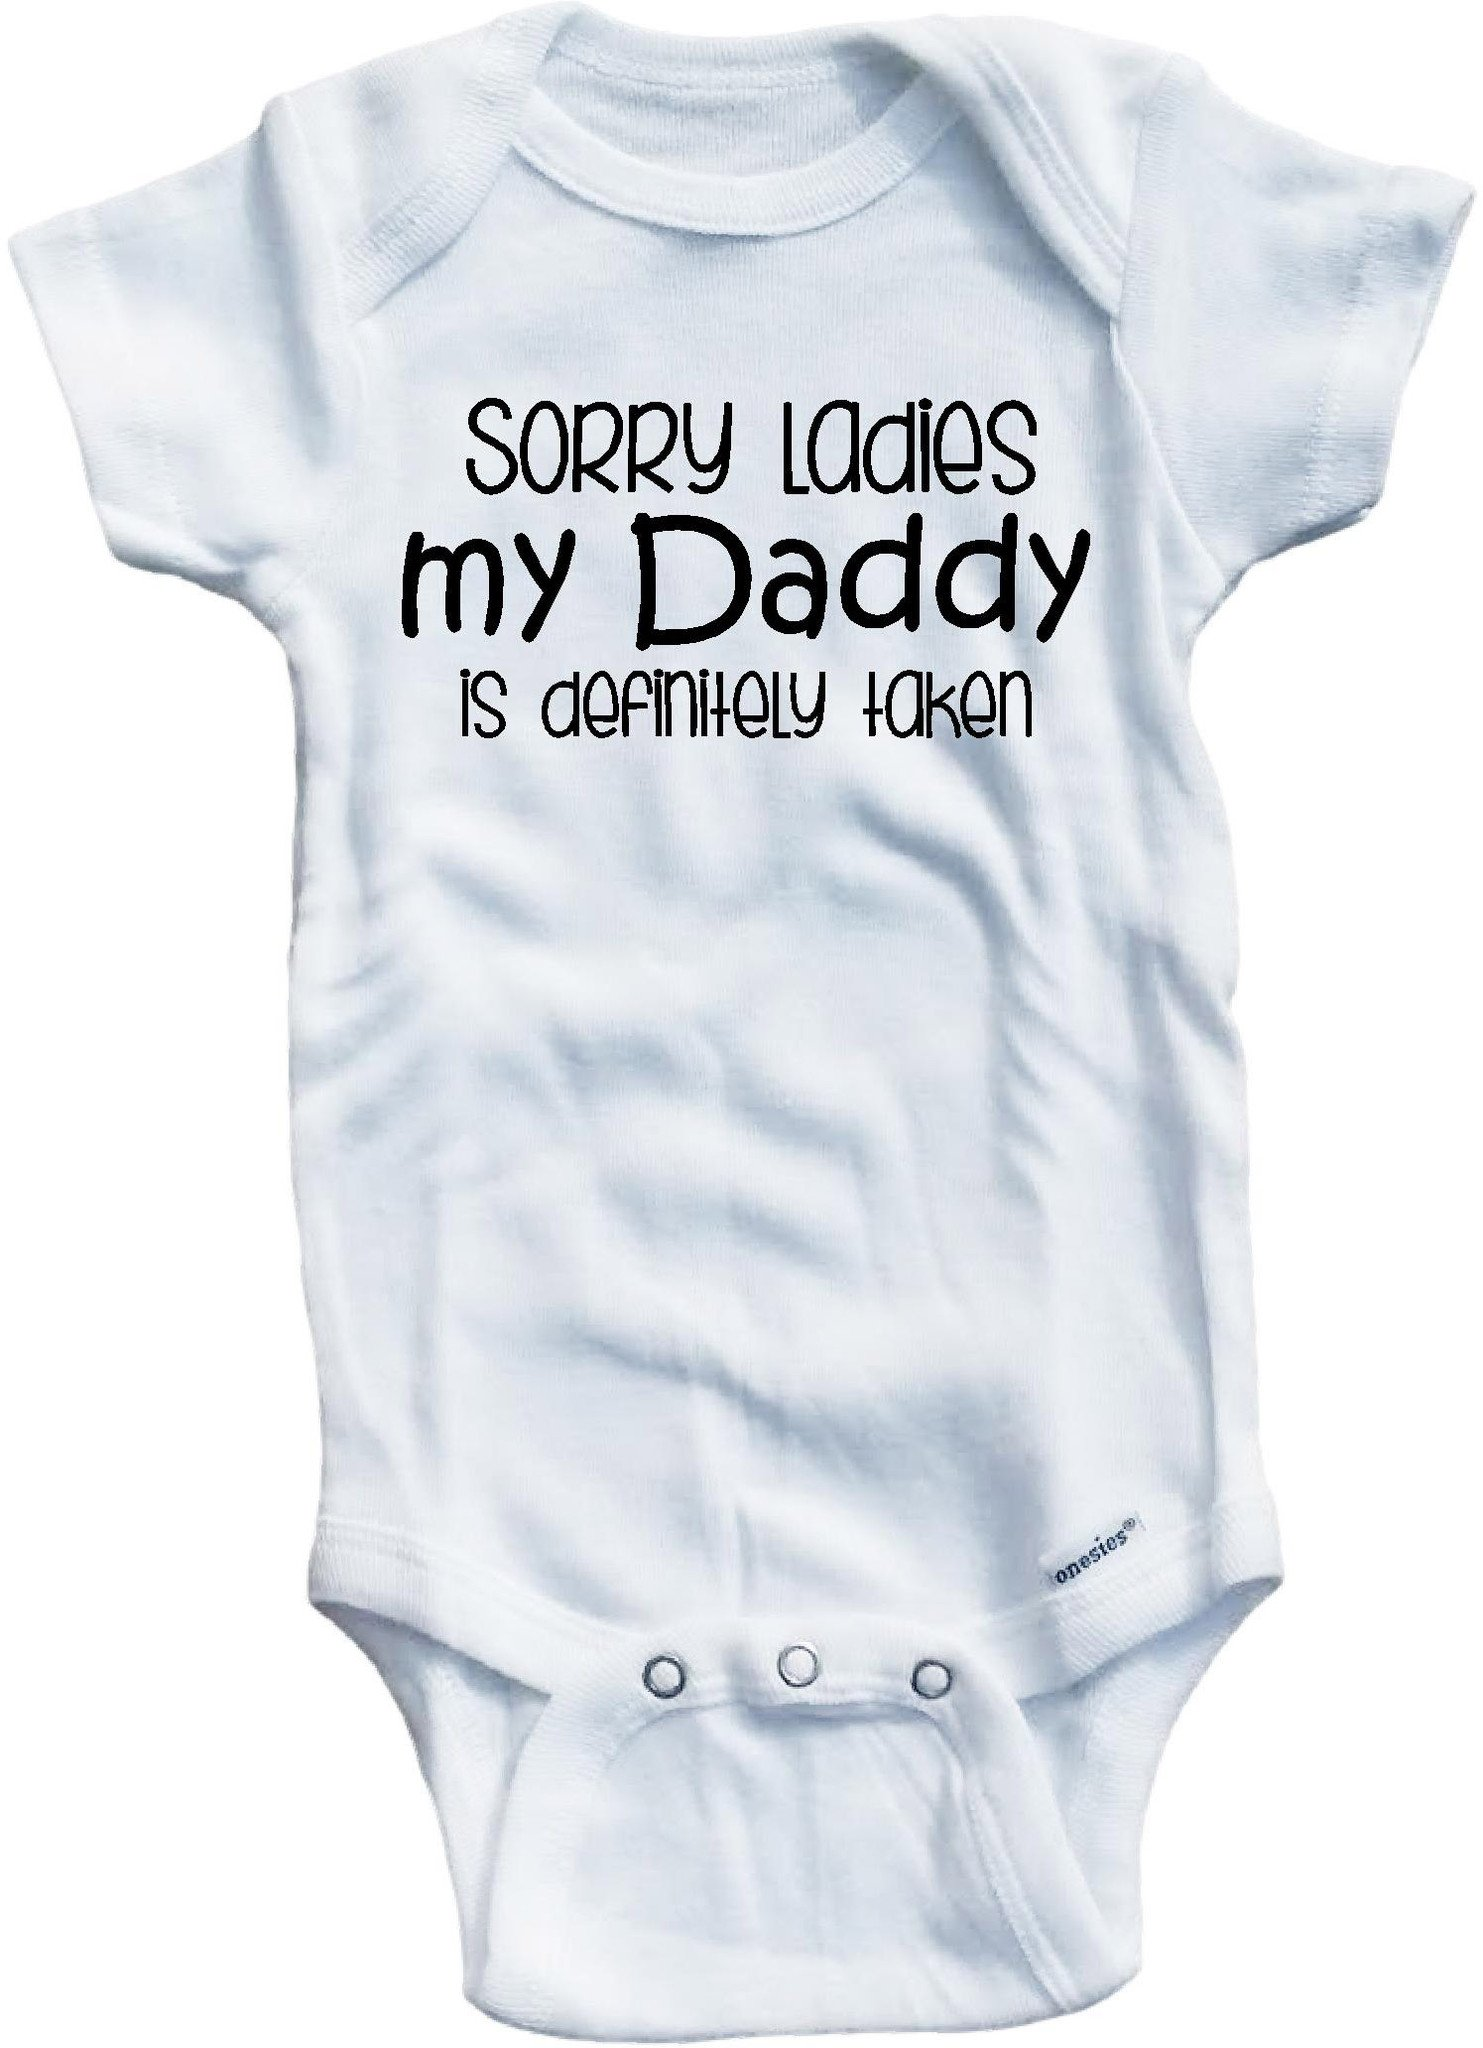

--- Similar Clothes---


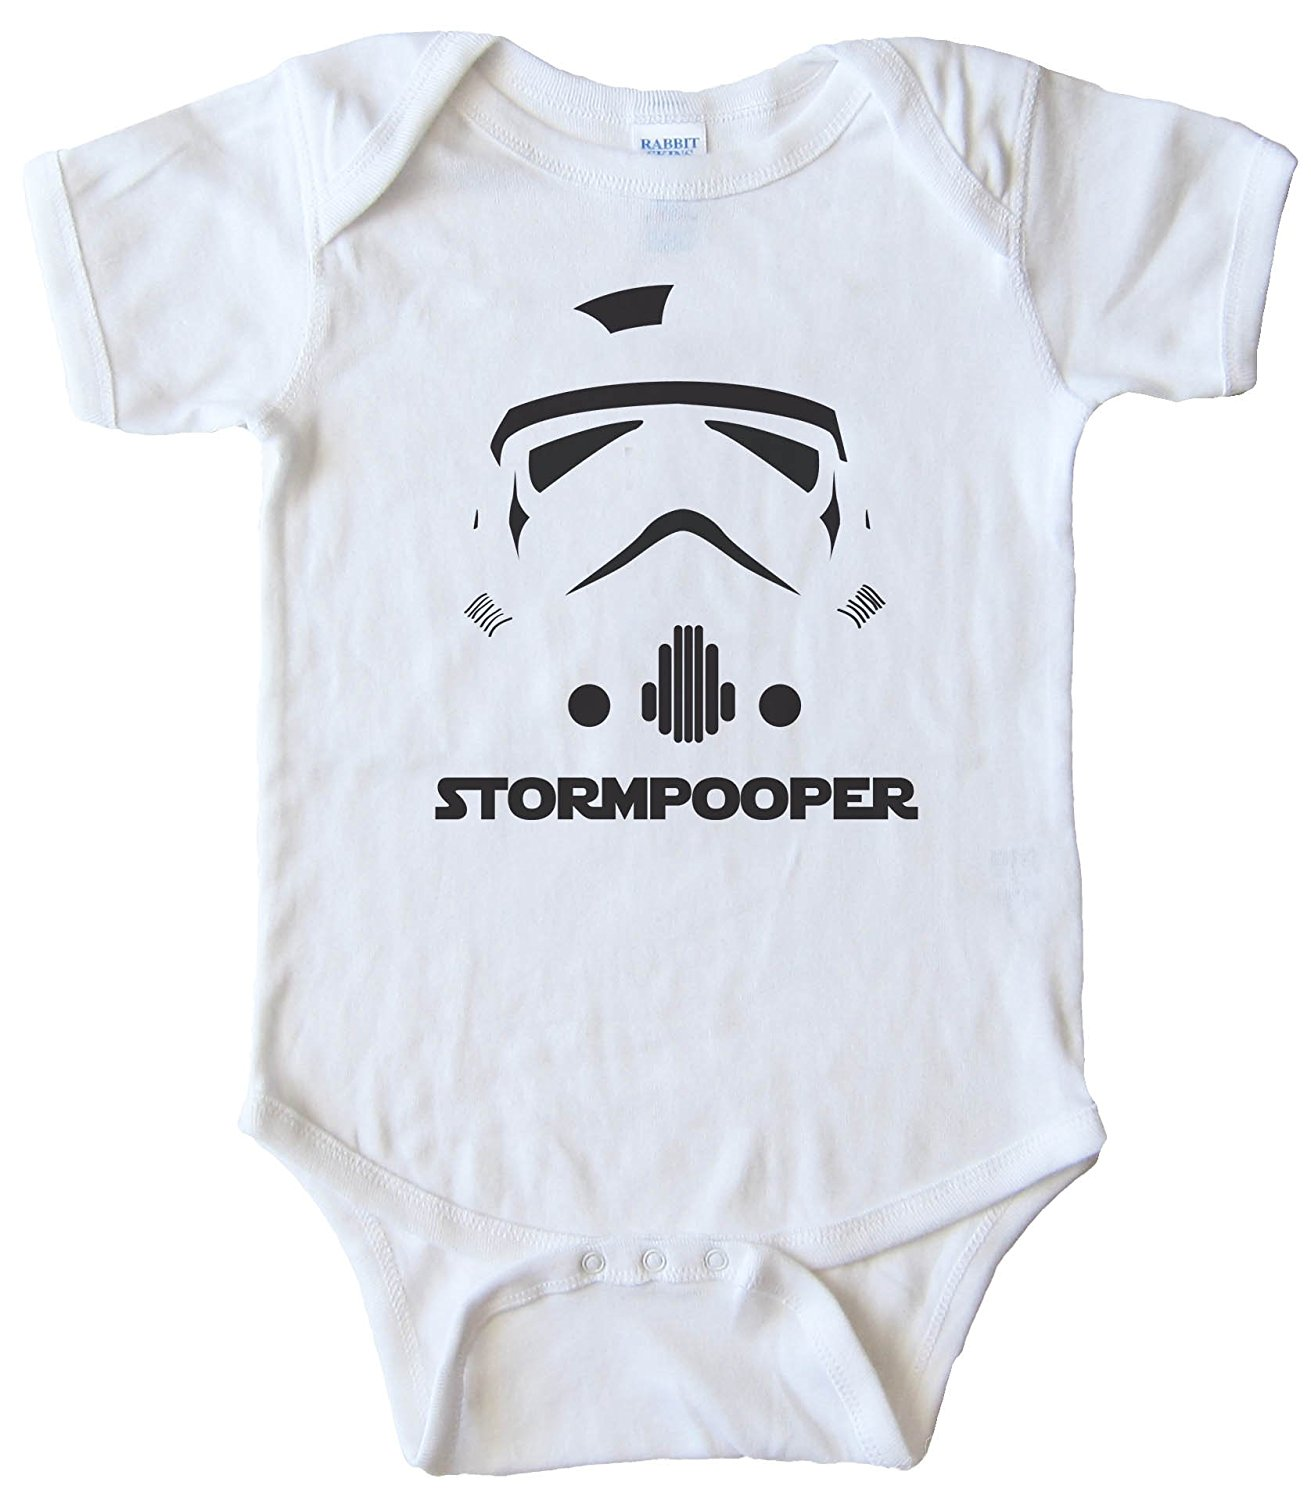

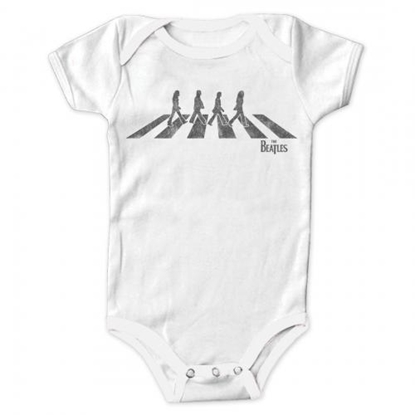

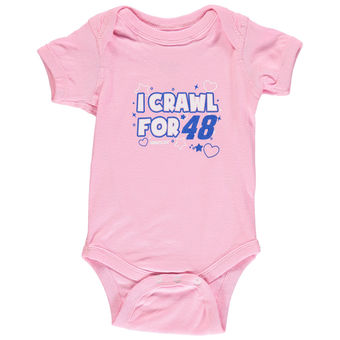

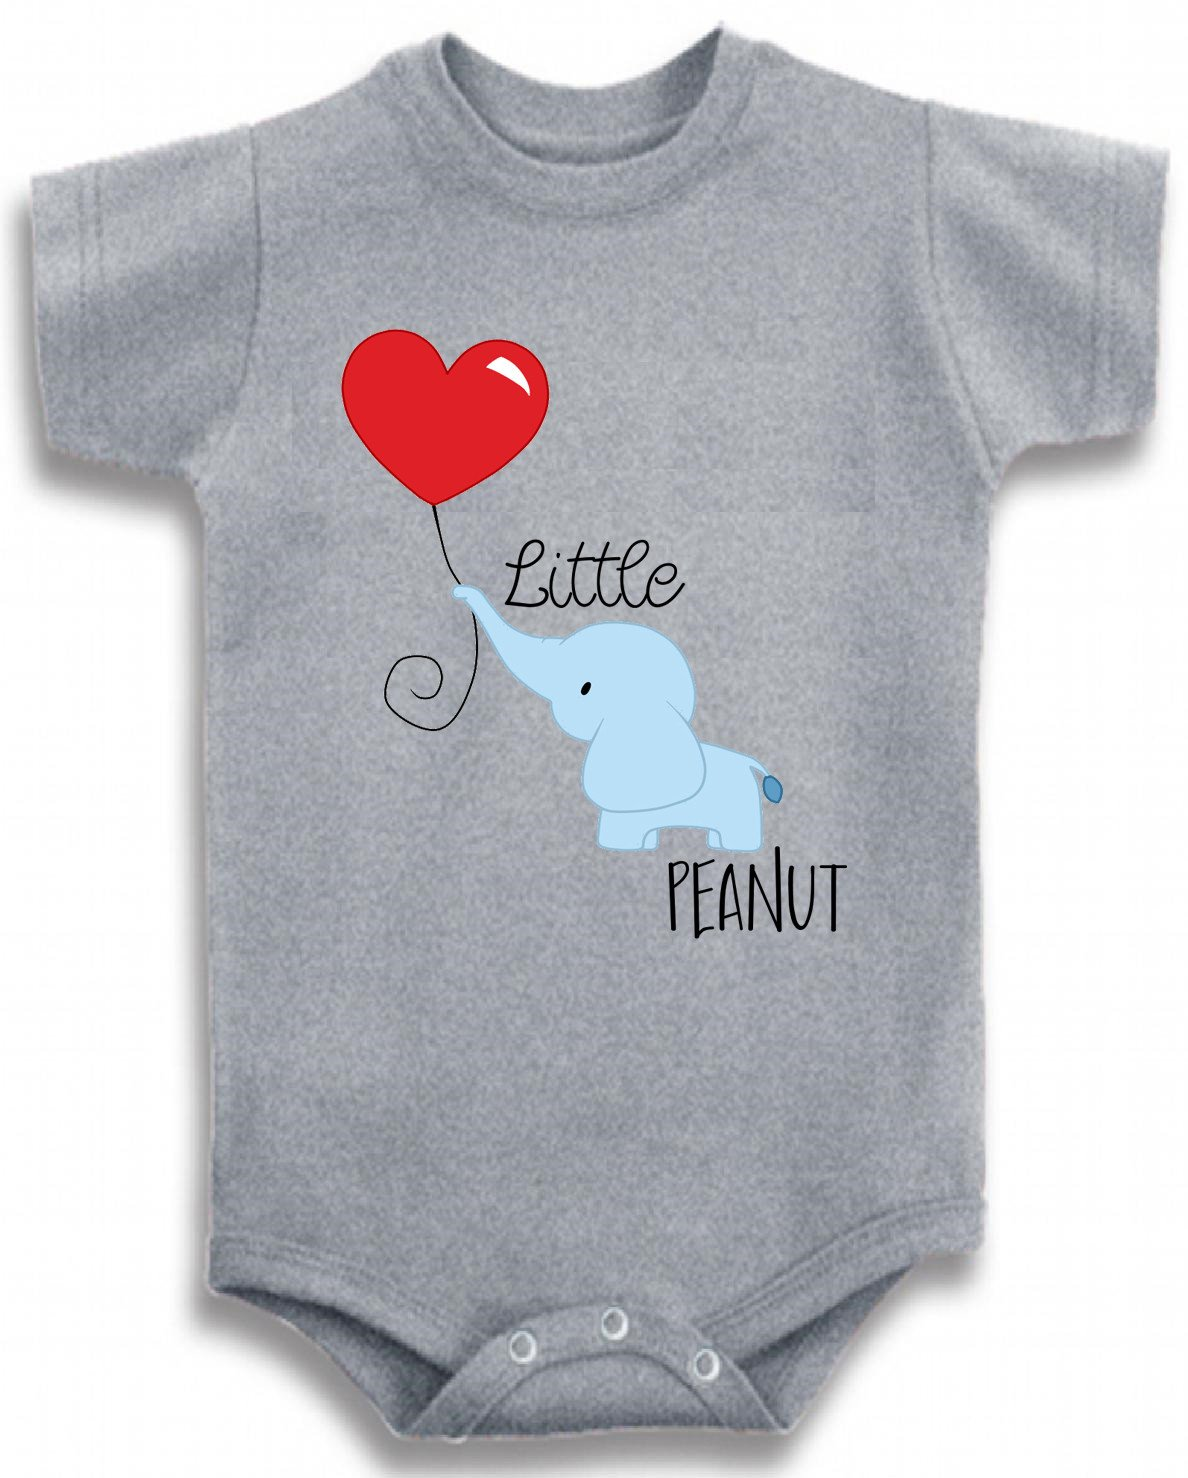

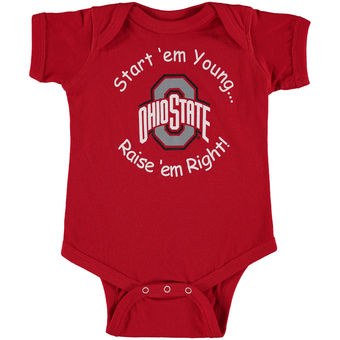

                     
=== Your Favorite === 1


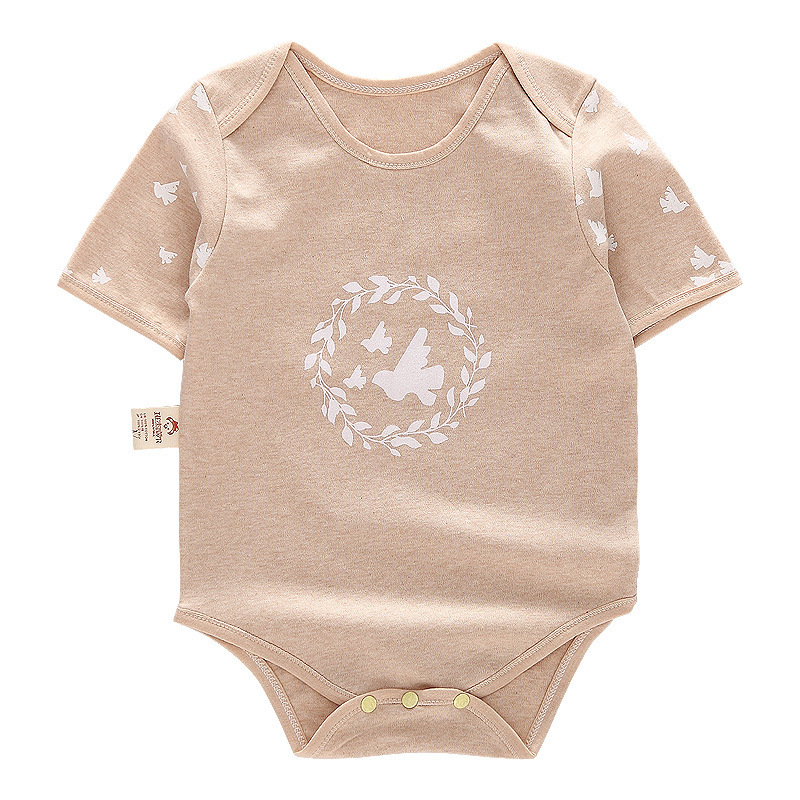

--- Similar Clothes---


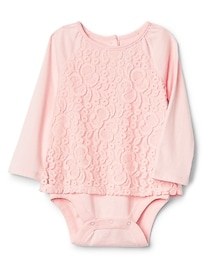

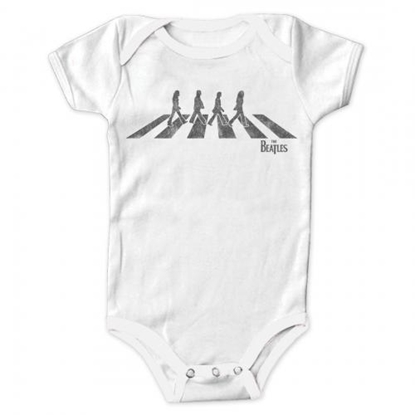

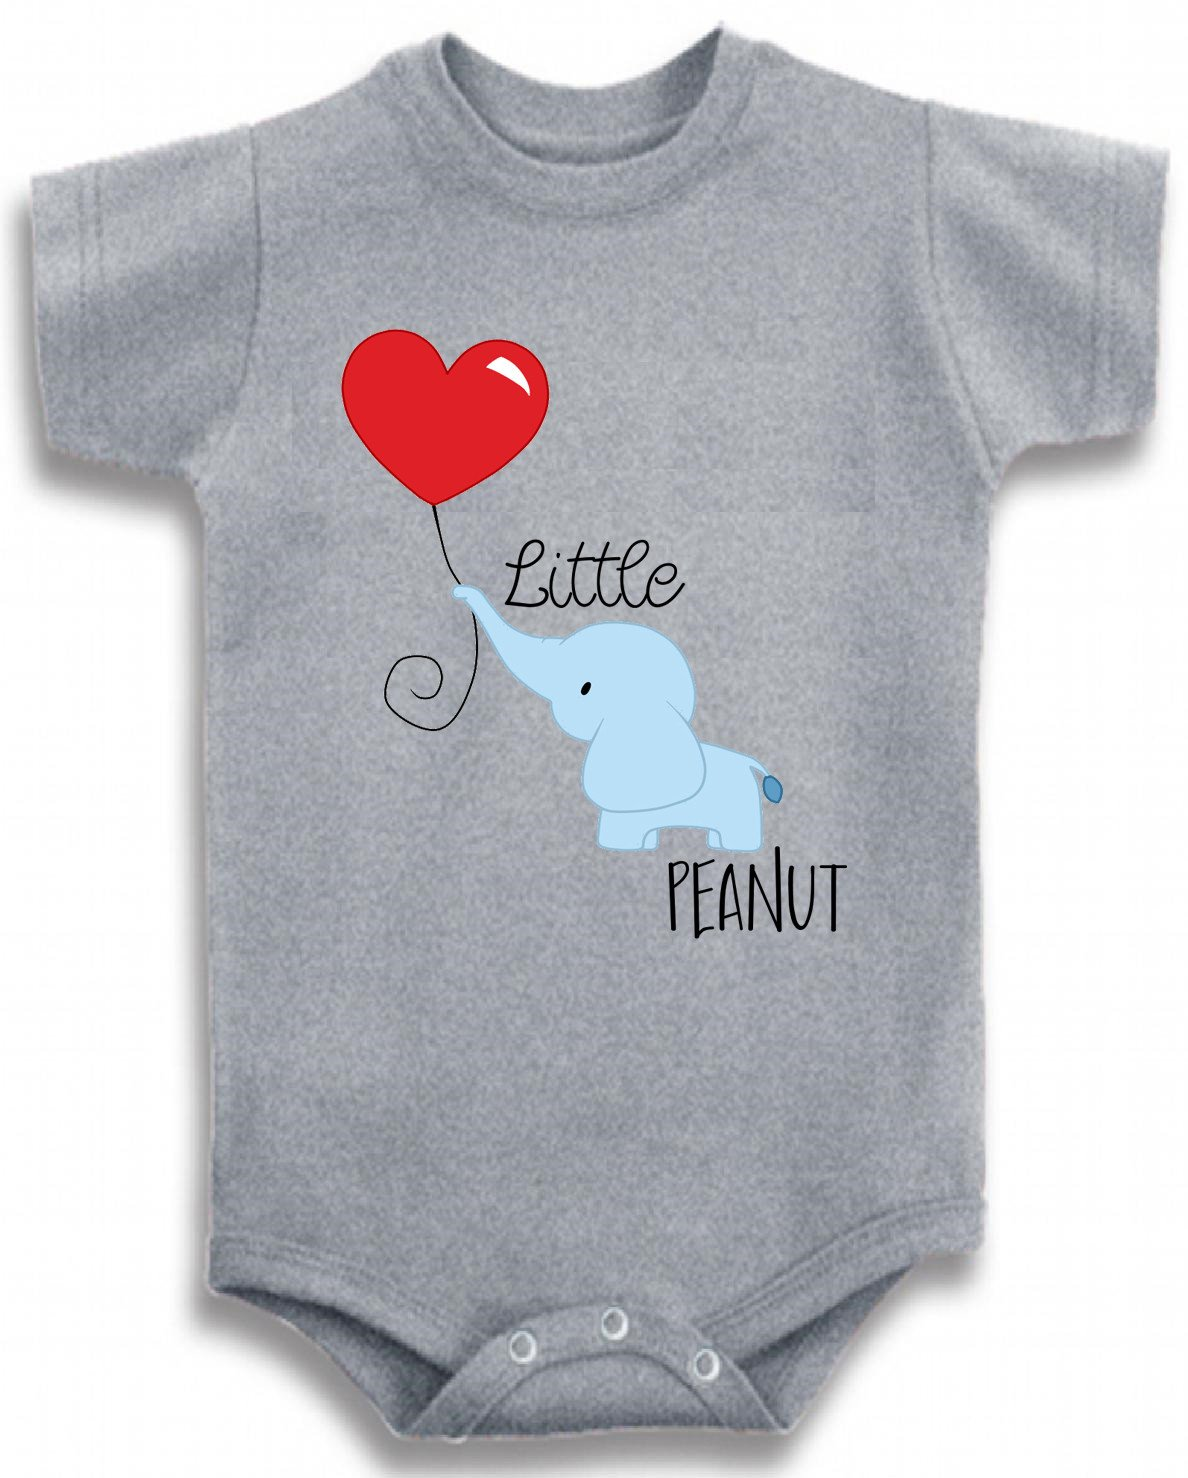

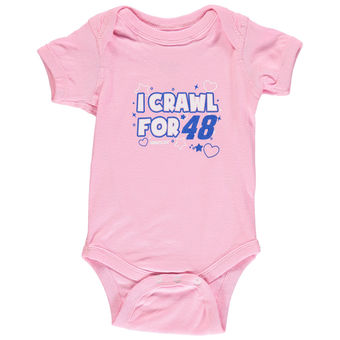

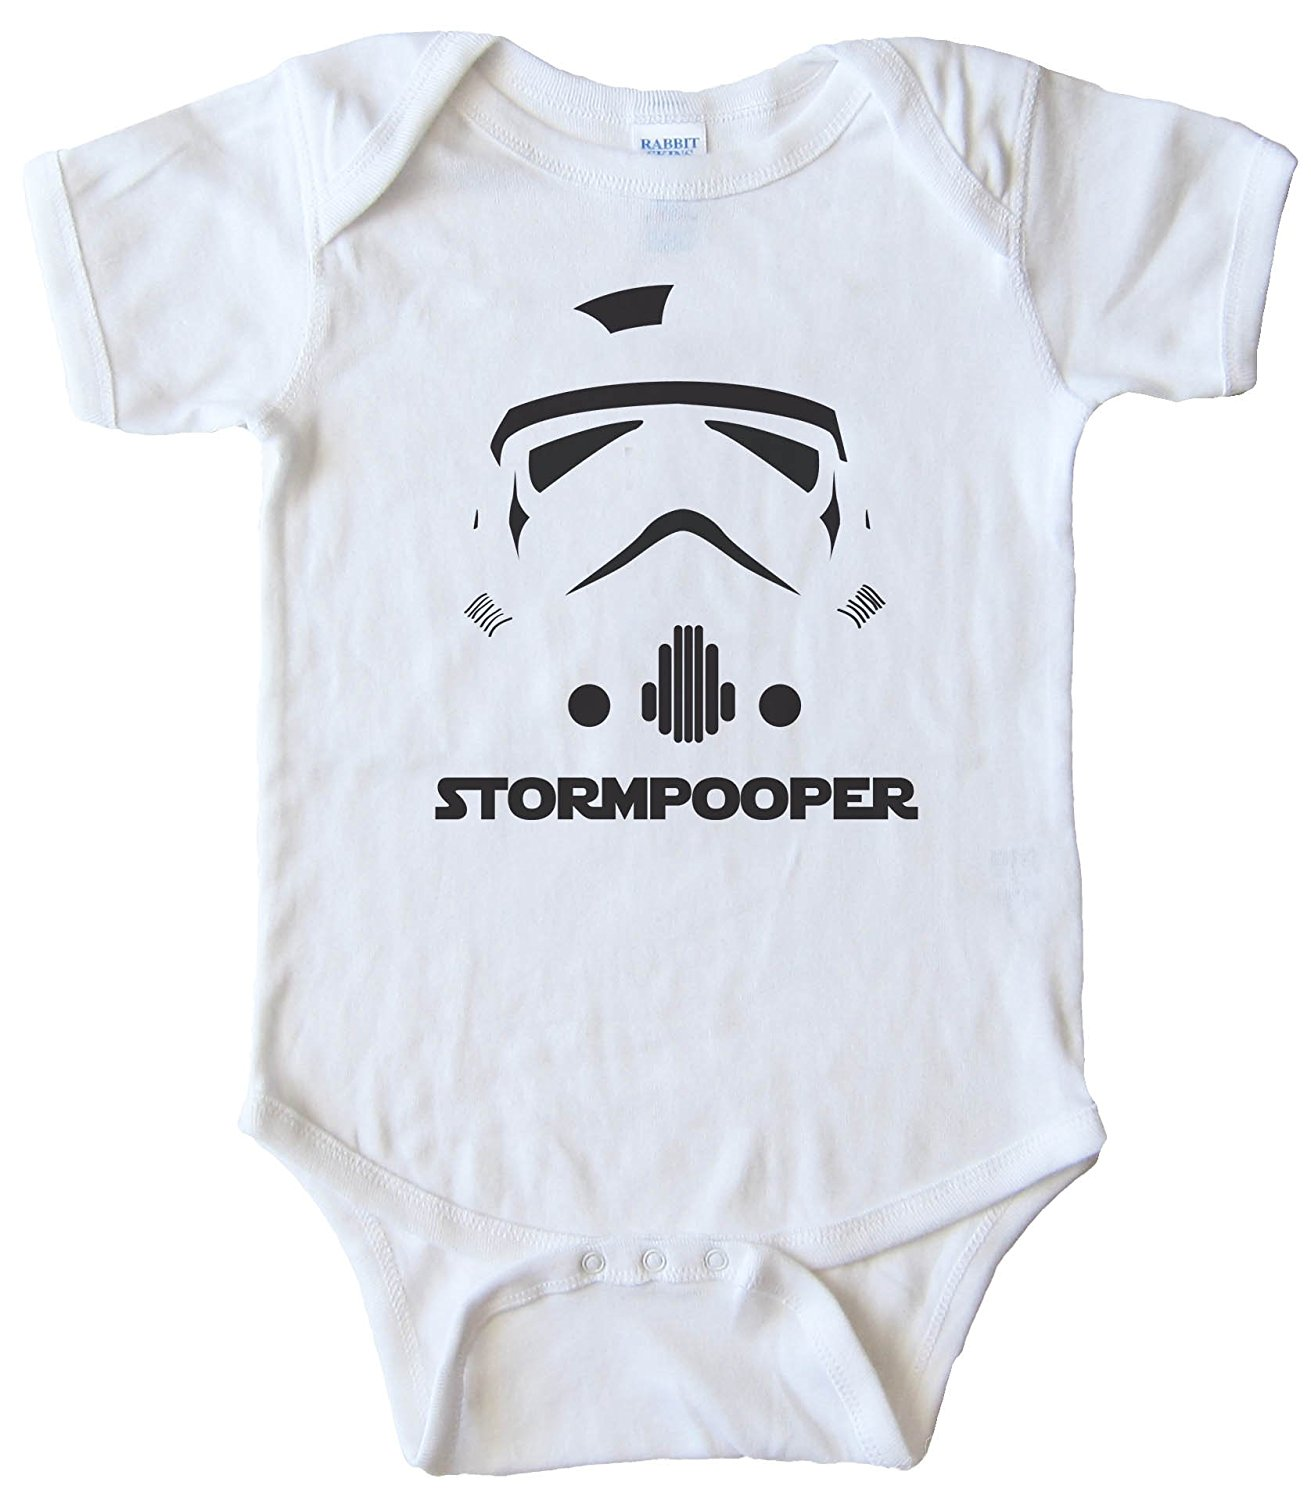

                     
=== Your Favorite === 2


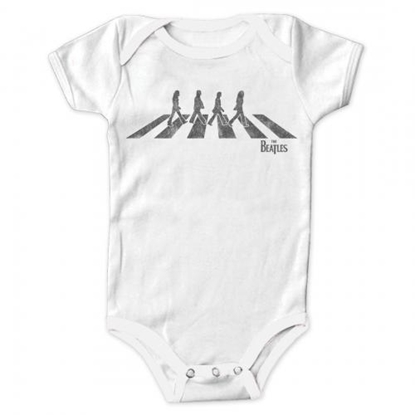

--- Similar Clothes---


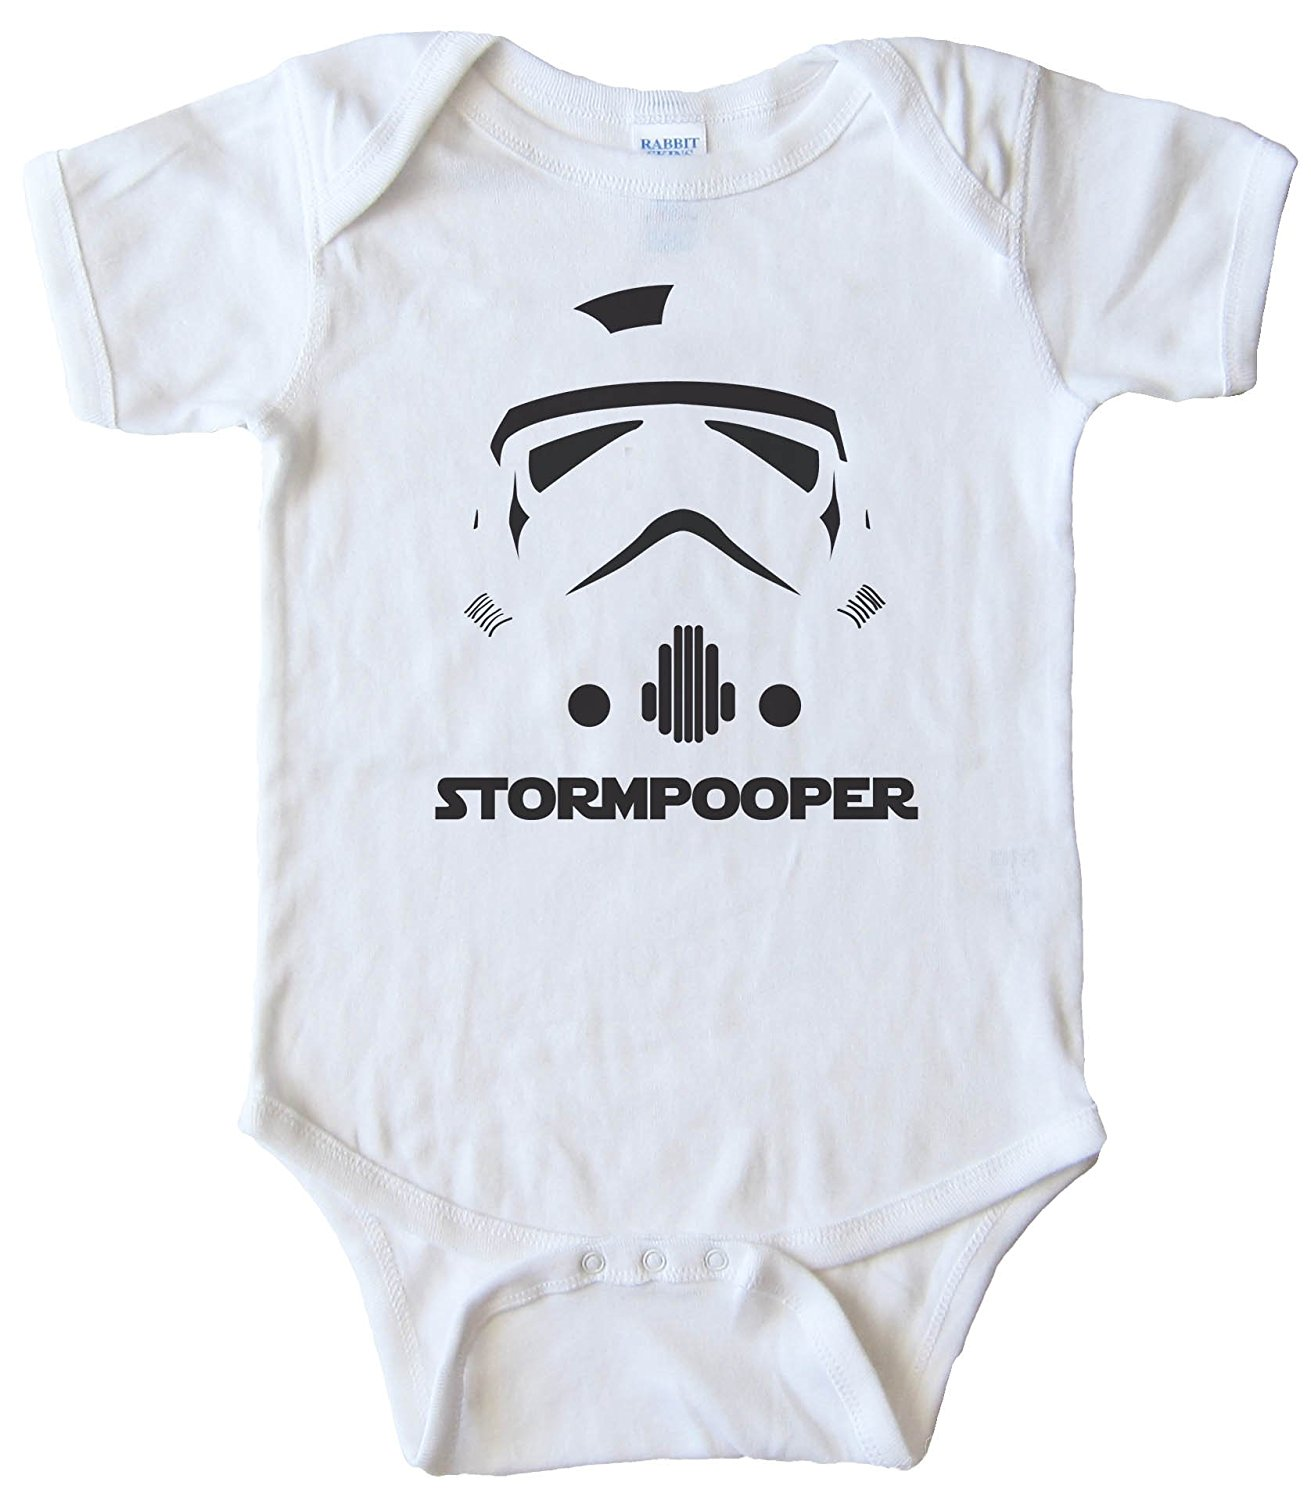

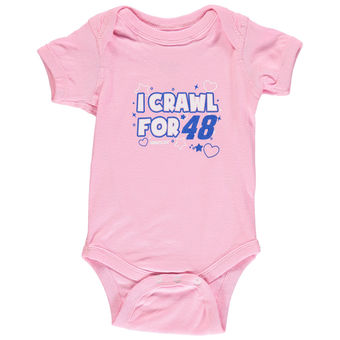

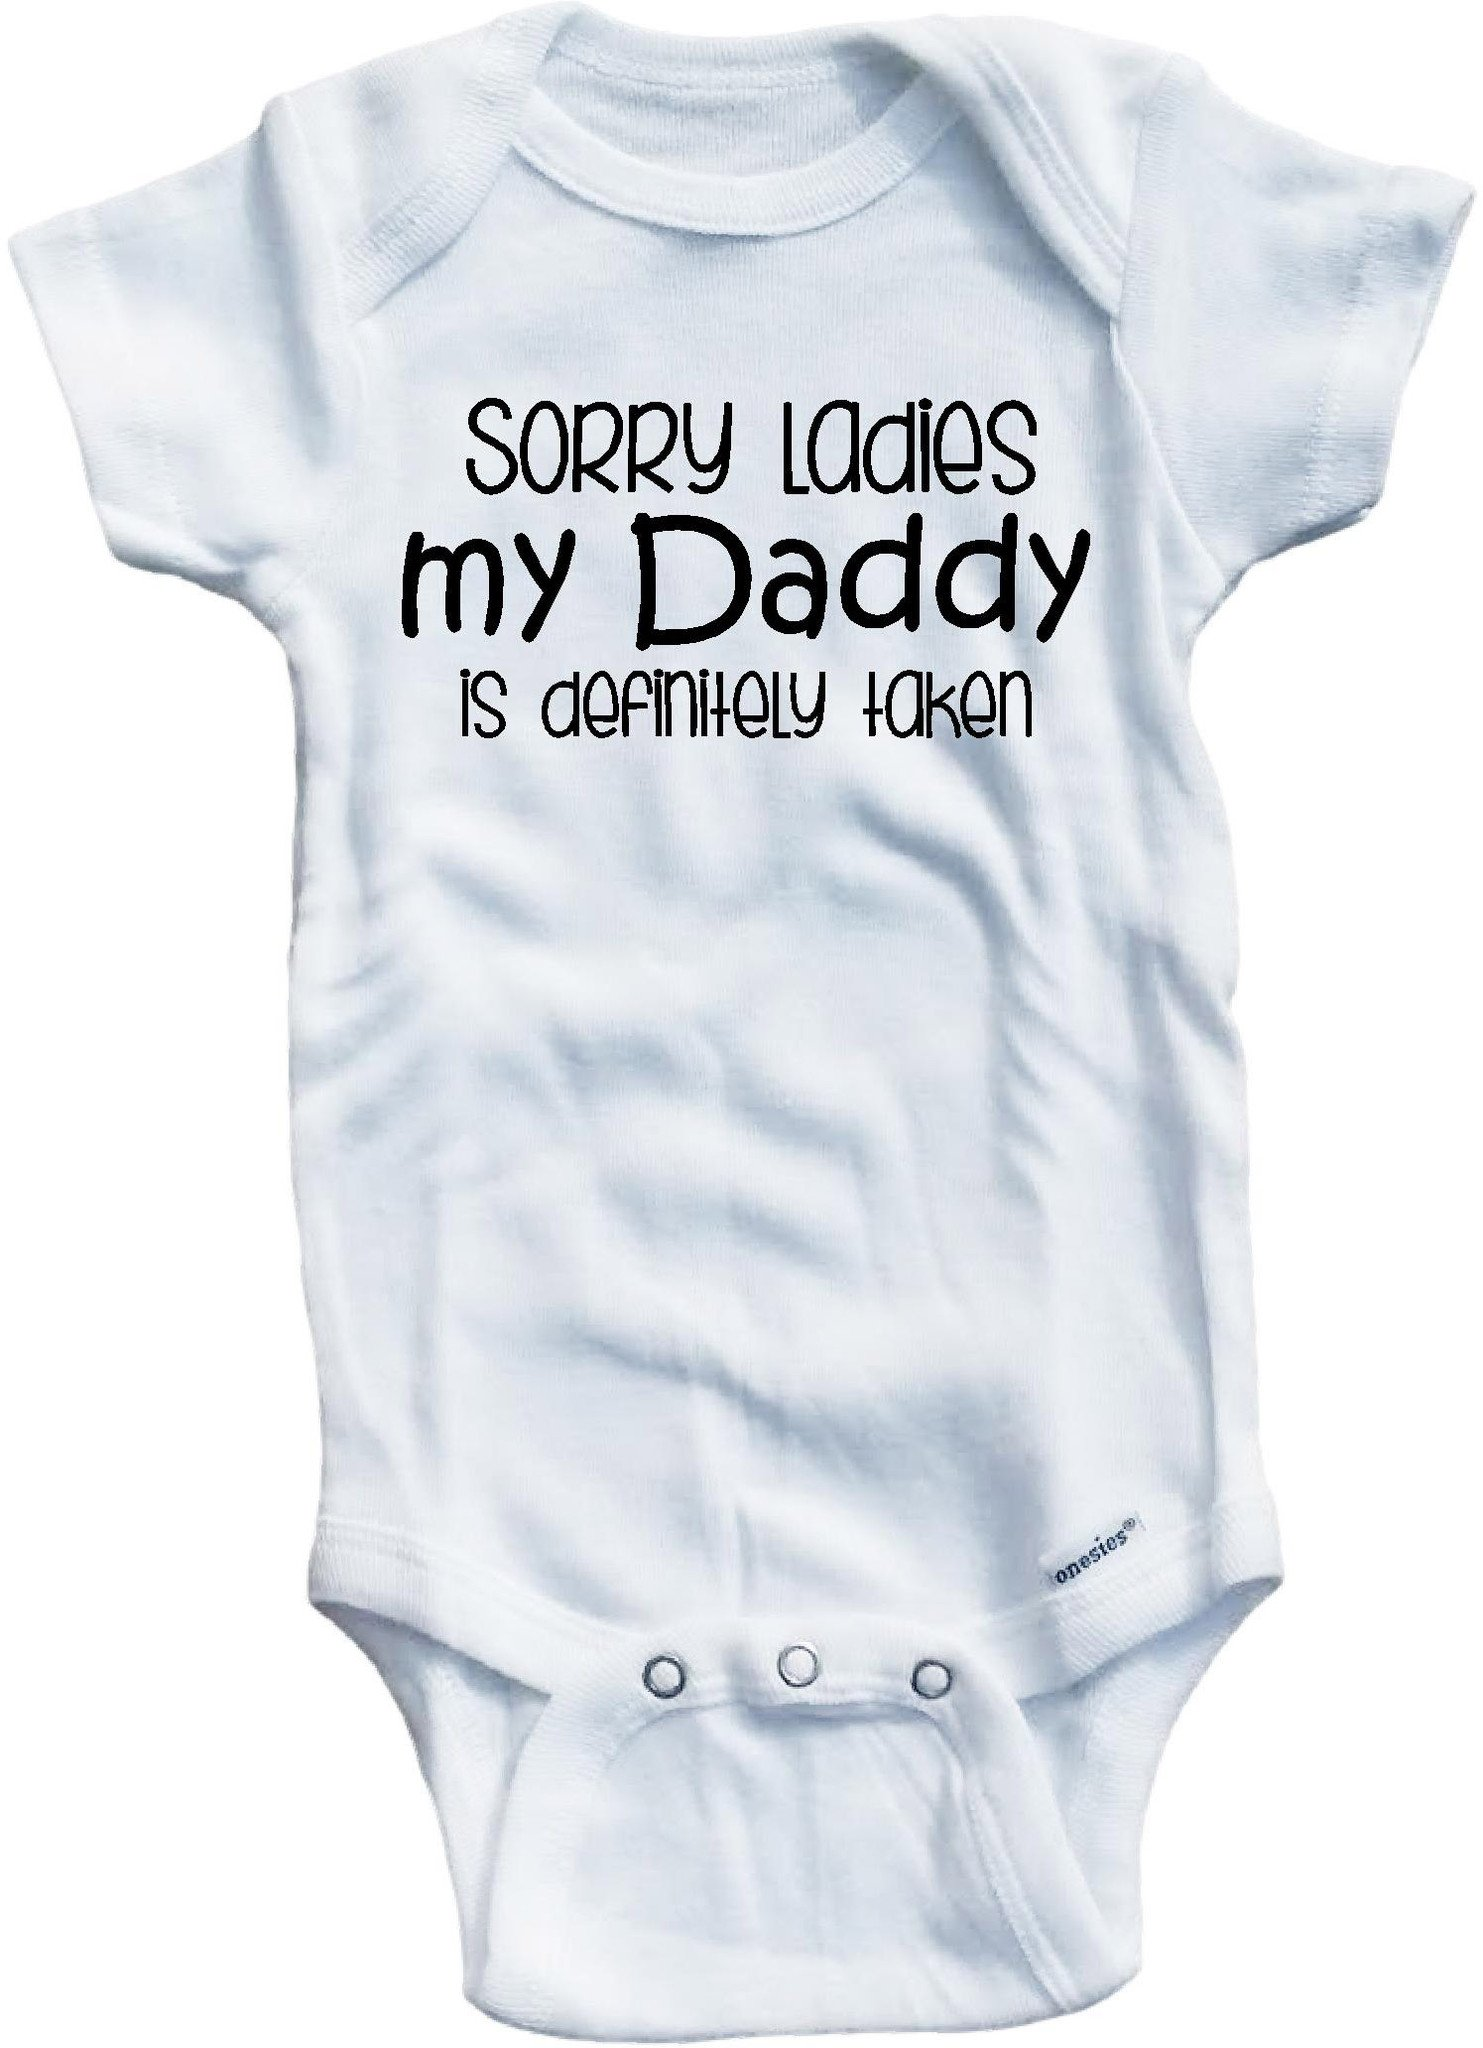

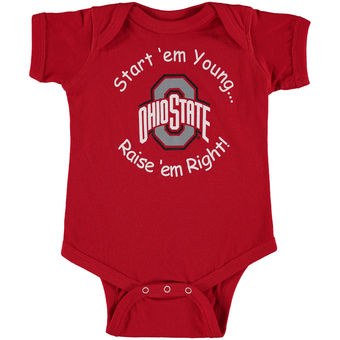

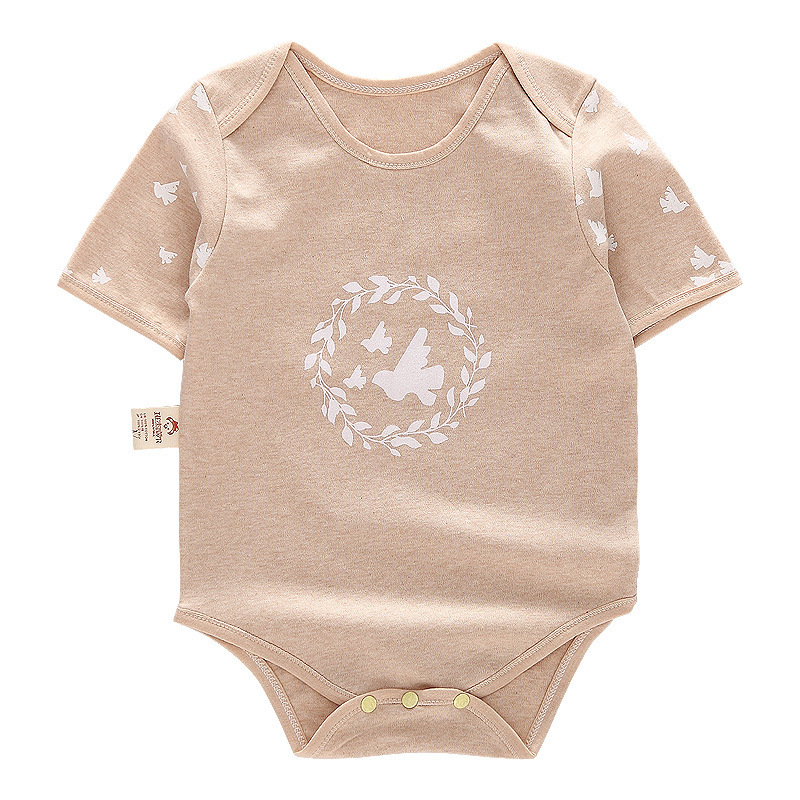

                     
=== Your Favorite === 3


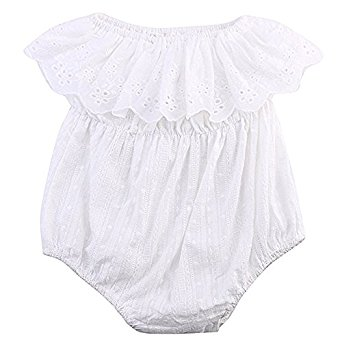

--- Similar Clothes---


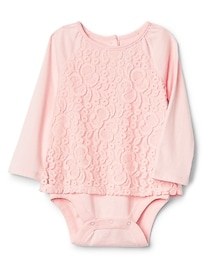

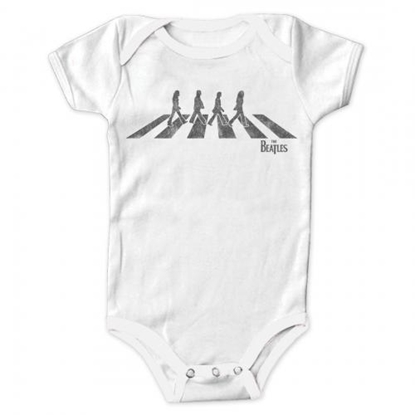

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
get_similar(dists)